## This code plots 1-cos gust for both traverse and actuator

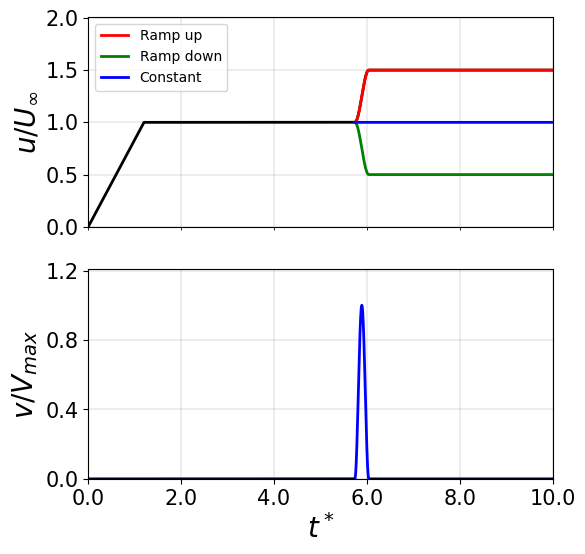

In [216]:
import numpy as np
import matplotlib.pyplot as plt

def one_miuns_cos_traverse(time):
    return( 0.5/2*(1-np.cos(2*np.pi/0.6*time)) + 1 )

def one_miuns_cos_actuator(time):
    return( 1/2*(1-np.cos(2*np.pi/0.3*time)))

t_total = 10   # 10s
freq    = 1000 # frequency sampling
T       = 0.3  # period is 0.3s
t       = np.arange(0,t_total,1/freq) # time
t1      = 1.2    # 1.2s for initial acceleration to 1m/s
a1      = 0.834  #  m/s^2; acceleration of the initial stage
t2      = 5.74   # 5.74s; this is the start time of the gust
t3      = t2 + T # 6.04s; this is the end time of the gust
v       = np.zeros(len(t))
v_ramp_up   = np.zeros(len(t[int(t2*freq):-1]))
v_ramp_down = np.zeros(len(t[int(t2*freq):-1]))
v_ramp_no   = np.zeros(len(t[int(t2*freq):-1])) + 1
v_actuator  = np.zeros(len(t))



# calculate the velocity 
for i in range(len(t)):
    if t[i] >= 0 and t[i] < t1:
        v[i] = a1 * t[i]
    elif t[i] >= t1 and t[i] < t2:
        v[i] = 1
    elif t[i] >= t2 and t[i] < t3:
        v[i] = one_miuns_cos_traverse(t[i]-t2)
        v_actuator[i] = one_miuns_cos_actuator(t[i]-t2)
    else:
        v[i] = 1.5

v_ramp_up   = v[int(t2*freq):-1]
v_ramp_down = 2- v[int(t2*freq):-1]
        
fig, ax = plt.subplots(2,1,figsize=(6,6))
ax[0].plot(t, v, color='black', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_up, color='red', label='Ramp up', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_down, color='green', label='Ramp down', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_no, color='blue', label='Constant', linewidth=2)

ax[0].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax[0].margins(x=0)
ax[0].set_yticks(np.arange(0,2.01,0.5))
ax[0].set_yticklabels(np.arange(0,2.01,0.5),fontsize=15)
ax[0].set_xticks([])  #(np.arange(0,10.01,2))
# ax[0].set_xticklabels(np.arange(0,10.01,2),fontsize=15)
ax[0].set_ylim(0,2.01)
ax[0].set_xlim(0,10.01)
ax[0].legend()
ax[0].set_ylabel('$u/U_{\infty}$',fontsize=20)
ax[0].tick_params(axis='x',direction='out', length=5, width=0.5, colors='black',
               grid_color='r', grid_alpha=0.5)
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(2))

ax[1].plot(t, v_actuator,color='blue', label='Actuator', linewidth=2)
ax[1].set_xlabel('$t^*$',fontsize=20)
ax[1].margins(x=0)
ax[1].set_xticks(np.arange(0,10.01,2))
ax[1].set_xticklabels(np.arange(0,10.01,2),fontsize=15)
ax[1].set_yticks(np.arange(0,1.21,0.4))
ax[1].set_yticklabels(np.round(np.arange(0,1.21,0.4),3),fontsize=15)
ax[1].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax[1].hlines(0, 0, t2, color='black', linewidth=2)
ax[1].hlines(0, t3, 10.01, color='black', linewidth=2)
ax[1].set_ylim(0,1.21)
ax[1].set_ylabel('$v/V_{max}$',fontsize=20)

fig.savefig('one_minus_cos.svg', bbox_inches='tight')

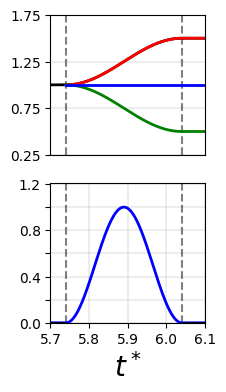

In [213]:
fig, ax = plt.subplots(2,1,figsize=(2,4))
ax[0].plot(t, v, color='black', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_up, color='red', label='Ramp up', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_down, color='green', label='Ramp down', linewidth=2)
ax[0].plot(t[int(t2*freq):-1], v_ramp_no, color='blue', label='Constant', linewidth=2)

ax[0].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax[0].margins(x=0)
ax[0].set_yticks(np.arange(0.25,1.751,0.5))
ax[0].set_ylim(0.25,1.751)
ax[0].set_xticks([])  #(np.arange(5.7,6.101,0.1))
ax[0].set_xlim(5.7,6.101)

ax[0].axvline(x=t2, color='gray', linestyle='--', zorder=1)
ax[0].axvline(x=t3, color='gray', linestyle='--', zorder=1)

ax[1].plot(t, v_actuator,color='blue', label='Actuator', linewidth=2)
ax[1].margins(x=0)
ax[1].set_xticks(np.arange(5.7,6.101,0.1))
ax[1].set_yticks(np.arange(0,1.21,0.4))
ax[1].set_yticklabels(np.round(np.arange(0,1.21,0.4),3))
ax[1].grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax[1].hlines(0, 0, t2, color='black', linewidth=2)
ax[1].hlines(0, t3, 10.01, color='black', linewidth=2)
ax[1].set_xticks(np.arange(5.7,6.101,0.1))
ax[1].set_xlim(5.7,6.101)
ax[1].set_yticks(np.arange(0,1.21,0.2))
ax[1].set_ylim(0,1.21)
ax[1].axvline(x=t2, color='gray', linestyle='--', zorder=1)
ax[1].axvline(x=t3, color='gray', linestyle='--', zorder=1)

fig.savefig('one_minus_cos_zoom_in.svg', bbox_inches='tight')